# **Analisis Predcitivo - Final**

El objetivo de este examen es predecir cuanto lee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from time import time
from sklearn.neighbors import KNeighborsClassifier
! pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
! pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
! pip install xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, confusion_matrix, 
    classification_report, make_scorer, ConfusionMatrixDisplay, 
)
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# **EDA**

In [2]:
base = pd.read_excel('base.xlsx')

In [5]:
print(base.head(5))

   Age     Sex                             Race     Marital status?  \
0   46    Male  Native American/American Indian             Married   
1   32    Male                       Mixed race  Never been married   
2   27    Male                       Mixed race             Married   
3   16  Female                       Mixed race  Never been married   
4   55  Female        Asian or Pacific Islander            Divorced   

                        Education                      Employement  \
0            High school graduate               Employed full-time   
1            High school graduate               Employed full-time   
2            High school graduate               Employed full-time   
3          High school incomplete               Employed part-time   
4  Some college, no 4-year degree  Have own business/self-employed   

                    Incomes  \
0         Less than $10,000   
1         Less than $10,000   
2  $40,000 to under $50,000   
3  $10,000 to under $20,000 

In [6]:
print('Cantidad de Filas y columnas:',base.shape)
print('Nombre columnas:',base.columns)

Cantidad de Filas y columnas: (1946, 15)
Nombre columnas: Index(['Age', 'Sex', 'Race', 'Marital status?', 'Education', 'Employement',
       'Incomes', 'How many books did you read during last 12months?',
       'Read any printed books during last 12months?',
       'Read any audiobooks during last 12months?',
       'Read any e-books during last 12months?', 'Last book you read, you…',
       'Do you happen to read any daily news or newspapers?',
       'Do you happen to read any magazines or journals?', 'Lee'],
      dtype='object')


In [7]:
print(base)

      Age     Sex                             Race     Marital status?  \
0      46    Male  Native American/American Indian             Married   
1      32    Male                       Mixed race  Never been married   
2      27    Male                       Mixed race             Married   
3      16  Female                       Mixed race  Never been married   
4      55  Female        Asian or Pacific Islander            Divorced   
...   ...     ...                              ...                 ...   
1941   17    Male                            White  Never been married   
1942   17  Female                            White  Never been married   
1943   16  Female                            White  Never been married   
1944   16  Female                            White  Never been married   
1945   16  Female                            White  Never been married   

                           Education                      Employement  \
0               High school graduate  

In [8]:
base.dtypes

Age                                                     int64
Sex                                                    object
Race                                                   object
Marital status?                                        object
Education                                              object
Employement                                            object
Incomes                                                object
How many books did you read during last 12months?       int64
Read any printed books during last 12months?           object
Read any audiobooks during last 12months?              object
Read any e-books during last 12months?                 object
Last book you read, you…                               object
Do you happen to read any daily news or newspapers?    object
Do you happen to read any magazines or journals?       object
Lee                                                    object
dtype: object

In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Age                                                  1946 non-null   int64 
 1   Sex                                                  1946 non-null   object
 2   Race                                                 1946 non-null   object
 3   Marital status?                                      1946 non-null   object
 4   Education                                            1946 non-null   object
 5   Employement                                          1946 non-null   object
 6   Incomes                                              1946 non-null   object
 7   How many books did you read during last 12months?    1946 non-null   int64 
 8   Read any printed books during last 12months?         1946 non-null   object
 9

In [10]:
base.isnull().sum()

Age                                                    0
Sex                                                    0
Race                                                   0
Marital status?                                        0
Education                                              0
Employement                                            0
Incomes                                                0
How many books did you read during last 12months?      0
Read any printed books during last 12months?           0
Read any audiobooks during last 12months?              0
Read any e-books during last 12months?                 0
Last book you read, you…                               0
Do you happen to read any daily news or newspapers?    0
Do you happen to read any magazines or journals?       0
Lee                                                    0
dtype: int64

In [11]:
base.describe()


,Age,How many books did you read during last 12months?
count,1946.000000,1946.000000
mean,46.249229,19.640288
std,17.768985,24.585303
min,16.000000,1.000000
25%,32.000000,4.000000
50%,47.000000,10.000000
75%,60.000000,25.000000
max,93.000000,97.000000


# **One Hot Encoding**

In [4]:
from sklearn.preprocessing import OneHotEncoder

Genero

In [5]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Sex']]).toarray())
print(encoder_df)

#merge one-hot encoded columns back with original DataFrame
final_df1 = base.join(encoder_df)

#drop column
final_df1.drop('Sex', axis=1, inplace=True)

#rename columns
final_df1.columns = ['Age','Race','Marital status?','Education','Employement','Incomes','How many books did you read during last 12months?','Read any printed books during last 12months?','Read any audiobooks during last 12months?','Read any e-books during last 12months?','Last book you read, you…','Do you happen to read any daily news or newspapers?','Do you happen to read any magazines or journals?', 'Lee','Female','Male']

#view final df
print(final_df1)
print('Nombre columnas:',final_df1.columns)

        0    1
0     0.0  1.0
1     0.0  1.0
2     0.0  1.0
3     1.0  0.0
4     1.0  0.0
...   ...  ...
1941  0.0  1.0
1942  1.0  0.0
1943  1.0  0.0
1944  1.0  0.0
1945  1.0  0.0

[1946 rows x 2 columns]
      Age                             Race     Marital status?  \
0      46  Native American/American Indian             Married   
1      32                       Mixed race  Never been married   
2      27                       Mixed race             Married   
3      16                       Mixed race  Never been married   
4      55        Asian or Pacific Islander            Divorced   
...   ...                              ...                 ...   
1941   17                            White  Never been married   
1942   17                            White  Never been married   
1943   16                            White  Never been married   
1944   16                            White  Never been married   
1945   16                            White  Never been married   

  

Raza

In [6]:
final_df1.drop('Race', axis=1, inplace=True)

Estado Civil

In [7]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Marital status?']]).toarray())
print(encoder_df)

#merge one-hot encoded columns back with original DataFrame
final_df3 = final_df1.join(encoder_df)

#drop column
final_df3.drop('Marital status?', axis=1, inplace=True)

#rename columns
final_df3.columns = ['Age','Education','Employement','Incomes','How many books did you read during last 12months?','Read any printed books during last 12months?','Read any audiobooks during last 12months?','Read any e-books during last 12months?','Last book you read, you…','Do you happen to read any daily news or newspapers?','Do you happen to read any magazines or journals?', 'Lee','Female','Male',
'Divorced','Living with a partner','Married','Never been married', 'Separated','Single','Widowed'
]

#view final df
print(final_df3)
print('Nombre columnas:',final_df3.columns)

        0    1    2    3    4    5    6
0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0
2     0.0  0.0  1.0  0.0  0.0  0.0  0.0
3     0.0  0.0  0.0  1.0  0.0  0.0  0.0
4     1.0  0.0  0.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...
1941  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1942  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1943  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1944  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1945  0.0  0.0  0.0  1.0  0.0  0.0  0.0

[1946 rows x 7 columns]
      Age                       Education                      Employement  \
0      46            High school graduate               Employed full-time   
1      32            High school graduate               Employed full-time   
2      27            High school graduate               Employed full-time   
3      16          High school incomplete               Employed part-time   
4      55  Some college, no 4-year degree  Have own business/self-employed   
...   ...                  

Educacion

In [8]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Education']]).toarray())
print(encoder_df)

#merge one-hot encoded columns back with original DataFrame
final_df4 = final_df3.join(encoder_df)

#drop column
final_df4.drop('Education', axis=1, inplace=True)

#rename columns
final_df4.columns = ['Age','Employement','Incomes','How many books did you read during last 12months?','Read any printed books during last 12months?','Read any audiobooks during last 12months?','Read any e-books during last 12months?','Last book you read, you…','Do you happen to read any daily news or newspapers?','Do you happen to read any magazines or journals?', 'Lee',
'Female','Male','Divorced','Living with a partner','Married','Never been married', 'Separated','Single','Widowed'
,'College graduate', 'High school graduate','High school incomplete','None', 'Post-graduate training/professional school after college','Some college, no 4-year degree','Technical, trade or vocational school AFTER high school']


#view final df
print(final_df4)
print('Nombre columnas:',final_df4.columns)

        0    1    2    3    4    5    6
0     0.0  1.0  0.0  0.0  0.0  0.0  0.0
1     0.0  1.0  0.0  0.0  0.0  0.0  0.0
2     0.0  1.0  0.0  0.0  0.0  0.0  0.0
3     0.0  0.0  1.0  0.0  0.0  0.0  0.0
4     0.0  0.0  0.0  0.0  0.0  1.0  0.0
...   ...  ...  ...  ...  ...  ...  ...
1941  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1942  0.0  1.0  0.0  0.0  0.0  0.0  0.0
1943  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1944  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1945  0.0  0.0  1.0  0.0  0.0  0.0  0.0

[1946 rows x 7 columns]
      Age                      Employement                   Incomes  \
0      46               Employed full-time         Less than $10,000   
1      32               Employed full-time         Less than $10,000   
2      27               Employed full-time  $40,000 to under $50,000   
3      16               Employed part-time  $10,000 to under $20,000   
4      55  Have own business/self-employed  $40,000 to under $50,000   
...   ...                              ...                     

Empleo

In [9]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Employement']]).toarray())
print(encoder_df)

#merge one-hot encoded columns back with original DataFrame
final_df5 = final_df4.join(encoder_df)

#drop column
final_df5.drop('Employement', axis=1, inplace=True)

#rename columns
final_df5.columns = ['Age','Incomes','How many books did you read during last 12months?','Read any printed books during last 12months?','Read any audiobooks during last 12months?','Read any e-books during last 12months?','Last book you read, you…','Do you happen to read any daily news or newspapers?','Do you happen to read any magazines or journals?', 'Lee',
'Female','Male','Divorced','Living with a partner','Married','Never been married', 'Separated','Single','Widowed','College graduate', 'High school graduate','High school incomplete','None', 'Post-graduate training/professional school after college','Some college, no 4-year degree','Technical, trade or vocational school AFTER high school',
'Disabled', 'Employed full-time','Employed part-time','Have own business/self-employed','Not employed for pay',
'Other', 'Retired','Student'
]

#view final df
print(final_df5)
print('Nombre columnas:',final_df5.columns)

        0    1    2    3    4    5    6    7
0     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...
1941  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1942  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1943  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1944  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1945  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0

[1946 rows x 8 columns]
      Age                   Incomes  \
0      46         Less than $10,000   
1      32         Less than $10,000   
2      27  $40,000 to under $50,000   
3      16  $10,000 to under $20,000   
4      55  $40,000 to under $50,000   
...   ...                       ...   
1941   17  $50,000 to under $75,000   
1942   17  $20,000 to under $30,000   
1943   16  $30,000 to under $40,000   
1944   16         Less than $10,000   
1945  

Ingreso

In [10]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Incomes']]).toarray())
print(encoder_df)

#merge one-hot encoded columns back with original DataFrame
final_df6 = final_df5.join(encoder_df)

#drop column
final_df6.drop('Incomes', axis=1, inplace=True)

#rename columns
final_df6.columns = ['Age','How many books did you read during last 12months?','Read any printed books during last 12months?','Read any audiobooks during last 12months?','Read any e-books during last 12months?','Last book you read, you…','Do you happen to read any daily news or newspapers?','Do you happen to read any magazines or journals?', 'Lee',
'Female','Male','Divorced','Living with a partner','Married','Never been married', 'Separated','Single','Widowed','College graduate', 'High school graduate','High school incomplete','None', 'Post-graduate training/professional school after college','Some college, no 4-year degree','Technical, trade or vocational school AFTER high school',
'Disabled', 'Employed full-time','Employed part-time','Have own business/self-employed','Not employed for pay',
'Other', 'Retired','Student',
'$10,000 to under $20,000', '$100,000 to under $150,000','$20,000 to under $30,000', '$30,000 to under $40,000',
'$40,000 to under $50,000','$50,000 to under $75,000','$75,000 to under $100,000','Less than $10,000'
]

#view final df
print(final_df6)
print('Nombre columnas:',final_df6.columns)

        0    1    2    3    4    5    6    7
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
3     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...
1941  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1942  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
1943  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1944  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
1945  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[1946 rows x 8 columns]
      Age  How many books did you read during last 12months?  \
0      46                                                 97   
1      32                                                 97   
2      27                                                 97   
3      16                                                 97   
4      55                                                 97   
...   ...                                          

Libros Impresos

In [11]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Read any printed books during last 12months?']]).toarray())
print(encoder_df)

#merge one-hot encoded columns back with original DataFrame
final_df7 = final_df6.join(encoder_df)

#drop column
final_df7.drop('Read any printed books during last 12months?', axis=1, inplace=True)

#rename columns
final_df7.columns = ['Age','How many books did you read during last 12months?','Read any audiobooks during last 12months?','Read any e-books during last 12months?','Last book you read, you…','Do you happen to read any daily news or newspapers?','Do you happen to read any magazines or journals?', 'Lee',
'Female','Male','Divorced','Living with a partner','Married','Never been married', 'Separated','Single','Widowed','College graduate', 'High school graduate','High school incomplete','None', 'Post-graduate training/professional school after college','Some college, no 4-year degree','Technical, trade or vocational school AFTER high school',
'Disabled', 'Employed full-time','Employed part-time','Have own business/self-employed','Not employed for pay',
'Other', 'Retired','Student',
'$10,000 to under $20,000', '$100,000 to under $150,000','$20,000 to under $30,000', '$30,000 to under $40,000',
'$40,000 to under $50,000','$50,000 to under $75,000','$75,000 to under $100,000','Less than $10,000','No_PB','Yes_PB'
]


        0    1
0     0.0  1.0
1     1.0  0.0
2     0.0  1.0
3     0.0  1.0
4     0.0  1.0
...   ...  ...
1941  0.0  1.0
1942  0.0  1.0
1943  0.0  1.0
1944  0.0  1.0
1945  0.0  1.0

[1946 rows x 2 columns]


Audiolibros

In [13]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Read any audiobooks during last 12months?']]).toarray())
print(encoder_df)

#merge one-hot encoded columns back with original DataFrame
final_df8 = final_df7.join(encoder_df)

#drop column
final_df8.drop('Read any audiobooks during last 12months?', axis=1, inplace=True)

#rename columns
final_df8.columns = ['Age','How many books did you read during last 12months?','Read any e-books during last 12months?','Last book you read, you…','Do you happen to read any daily news or newspapers?','Do you happen to read any magazines or journals?', 'Lee',
'Female','Male','Divorced','Living with a partner','Married','Never been married', 'Separated','Single','Widowed','College graduate', 'High school graduate','High school incomplete','None', 'Post-graduate training/professional school after college','Some college, no 4-year degree','Technical, trade or vocational school AFTER high school',
'Disabled', 'Employed full-time','Employed part-time','Have own business/self-employed','Not employed for pay',
'Other', 'Retired','Student',
'$10,000 to under $20,000', '$100,000 to under $150,000','$20,000 to under $30,000', '$30,000 to under $40,000',
'$40,000 to under $50,000','$50,000 to under $75,000','$75,000 to under $100,000','Less than $10,000','No_PB','Yes_PB',
'No_AB','Yes_AB'
]

        0    1
0     0.0  1.0
1     0.0  1.0
2     1.0  0.0
3     0.0  1.0
4     0.0  1.0
...   ...  ...
1941  1.0  0.0
1942  1.0  0.0
1943  1.0  0.0
1944  1.0  0.0
1945  1.0  0.0

[1946 rows x 2 columns]


Ebooks

In [14]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Read any e-books during last 12months?']]).toarray())
print(encoder_df)

#merge one-hot encoded columns back with original DataFrame
final_df9 = final_df8.join(encoder_df)

#drop column
final_df9.drop('Read any e-books during last 12months?', axis=1, inplace=True)

#rename columns
final_df9.columns = ['Age','How many books did you read during last 12months?','Last book you read, you…','Do you happen to read any daily news or newspapers?','Do you happen to read any magazines or journals?', 'Lee',
'Female','Male','Divorced','Living with a partner','Married','Never been married', 'Separated','Single','Widowed','College graduate', 'High school graduate','High school incomplete','None', 'Post-graduate training/professional school after college','Some college, no 4-year degree','Technical, trade or vocational school AFTER high school',
'Disabled', 'Employed full-time','Employed part-time','Have own business/self-employed','Not employed for pay',
'Other', 'Retired','Student',
'$10,000 to under $20,000', '$100,000 to under $150,000','$20,000 to under $30,000', '$30,000 to under $40,000',
'$40,000 to under $50,000','$50,000 to under $75,000','$75,000 to under $100,000','Less than $10,000','No_PB','Yes_PB',
'No_AB','Yes_AB',
'No_EB','Yes_EB'
]

        0    1
0     0.0  1.0
1     0.0  1.0
2     0.0  1.0
3     1.0  0.0
4     0.0  1.0
...   ...  ...
1941  1.0  0.0
1942  1.0  0.0
1943  1.0  0.0
1944  1.0  0.0
1945  1.0  0.0

[1946 rows x 2 columns]


Ultimo libro que leiste?

In [15]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Last book you read, you…']]).toarray())
print(encoder_df)

#merge one-hot encoded columns back with original DataFrame
final_df10 = final_df9.join(encoder_df)

#drop column
final_df10.drop('Last book you read, you…', axis=1, inplace=True)

#rename columns
final_df10.columns = ['Age','How many books did you read during last 12months?','Do you happen to read any daily news or newspapers?','Do you happen to read any magazines or journals?', 'Lee',
'Female','Male','Divorced','Living with a partner','Married','Never been married', 'Separated','Single','Widowed','College graduate', 'High school graduate','High school incomplete','None', 'Post-graduate training/professional school after college','Some college, no 4-year degree','Technical, trade or vocational school AFTER high school',
'Disabled', 'Employed full-time','Employed part-time','Have own business/self-employed','Not employed for pay',
'Other', 'Retired','Student',
'$10,000 to under $20,000', '$100,000 to under $150,000','$20,000 to under $30,000', '$30,000 to under $40,000',
'$40,000 to under $50,000','$50,000 to under $75,000','$75,000 to under $100,000','Less than $10,000','No_PB','Yes_PB',
'No_AB','Yes_AB',
'No_EB','Yes_EB',
'Borrowed the book from a friend or family member','Borrowed the book from a library','Got the book some other way','Purchased the book'
]

        0    1    2    3
0     0.0  0.0  0.0  1.0
1     1.0  0.0  0.0  0.0
2     0.0  1.0  0.0  0.0
3     0.0  0.0  0.0  1.0
4     0.0  0.0  0.0  1.0
...   ...  ...  ...  ...
1941  0.0  1.0  0.0  0.0
1942  1.0  0.0  0.0  0.0
1943  0.0  0.0  0.0  1.0
1944  0.0  1.0  0.0  0.0
1945  0.0  1.0  0.0  0.0

[1946 rows x 4 columns]


Diarios

In [16]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Do you happen to read any daily news or newspapers?']]).toarray())
print(encoder_df)

#merge one-hot encoded columns back with original DataFrame
final_df11 = final_df10.join(encoder_df)

#drop column
final_df11.drop('Do you happen to read any daily news or newspapers?', axis=1, inplace=True)

#rename columns
final_df11.columns = ['Age','How many books did you read during last 12months?','Do you happen to read any magazines or journals?', 'Lee',
'Female','Male','Divorced','Living with a partner','Married','Never been married', 'Separated','Single','Widowed','College graduate', 'High school graduate','High school incomplete','None', 'Post-graduate training/professional school after college','Some college, no 4-year degree','Technical, trade or vocational school AFTER high school',
'Disabled', 'Employed full-time','Employed part-time','Have own business/self-employed','Not employed for pay',
'Other', 'Retired','Student',
'$10,000 to under $20,000', '$100,000 to under $150,000','$20,000 to under $30,000', '$30,000 to under $40,000',
'$40,000 to under $50,000','$50,000 to under $75,000','$75,000 to under $100,000','Less than $10,000','No_PB','Yes_PB',
'No_AB','Yes_AB',
'No_EB','Yes_EB',
'Borrowed the book from a friend or family member','Borrowed the book from a library','Got the book some other way','Purchased the book',
'No_NP','Yes_NP'
]

        0    1
0     0.0  1.0
1     0.0  1.0
2     0.0  1.0
3     0.0  1.0
4     1.0  0.0
...   ...  ...
1941  1.0  0.0
1942  1.0  0.0
1943  1.0  0.0
1944  1.0  0.0
1945  1.0  0.0

[1946 rows x 2 columns]


Revistas

In [17]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(base[['Do you happen to read any magazines or journals?']]).toarray())
print(encoder_df)
#merge one-hot encoded columns back with original DataFrame
final_df12 = final_df11.join(encoder_df)

#drop column
final_df12.drop('Do you happen to read any magazines or journals?', axis=1, inplace=True)

#rename columns
final_df12.columns = ['Age','How many books did you read during last 12months?', 'Lee',
'Female','Male','Divorced','Living with a partner','Married','Never been married', 'Separated','Single','Widowed','College graduate', 'High school graduate','High school incomplete','None', 'Post-graduate training/professional school after college','Some college, no 4-year degree','Technical, trade or vocational school AFTER high school',
'Disabled', 'Employed full-time','Employed part-time','Have own business/self-employed','Not employed for pay',
'Other', 'Retired','Student',
'$10,000 to under $20,000', '$100,000 to under $150,000','$20,000 to under $30,000', '$30,000 to under $40,000',
'$40,000 to under $50,000','$50,000 to under $75,000','$75,000 to under $100,000','Less than $10,000','No_PB','Yes_PB',
'No_AB','Yes_AB',
'No_EB','Yes_EB',
'Borrowed the book from a friend or family member','Borrowed the book from a library','Got the book some other way','Purchased the book',
'No_NP','Yes_NP','No_M','Yes_M'
]

        0    1
0     0.0  1.0
1     0.0  1.0
2     1.0  0.0
3     1.0  0.0
4     1.0  0.0
...   ...  ...
1941  0.0  1.0
1942  1.0  0.0
1943  1.0  0.0
1944  1.0  0.0
1945  1.0  0.0

[1946 rows x 2 columns]


In [32]:
base = final_df12

## **Modelos**

**Partición**

Como tengo clases, es una particion estratificada ya que quiero que el conjunto de entrenamiento y testeo tengan todas las clases

In [19]:
X= base[['Age',
'Male','Female','Married', 'Never been married', 'Divorced' ,'Widowed', 'Living with a partner', 'Single','Separated','High school graduate','High school incomplete','Some college, no 4-year degree','College graduate',
'Post-graduate training/professional school after college','Technical, trade or vocational school AFTER high school','None',
'Employed full-time','Employed part-time','Have own business/self-employed',
'Retired','Student','Other','Not employed for pay','Disabled',
'Less than $10,000','$40,000 to under $50,000','$10,000 to under $20,000',
'$50,000 to under $75,000','$100,000 to under $150,000',
'$75,000 to under $100,000',
'$30,000 to under $40,000',
'$20,000 to under $30,000','Yes_PB','No_PB','Yes_AB','No_AB','Yes_EB','No_EB',
'Purchased the book','Borrowed the book from a friend or family member','Borrowed the book from a library','Got the book some other way','Yes_NP','No_NP','Yes_M','No_M']]
y= base[['Lee']]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y,test_size=0.20, random_state=0)

In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,  stratify=y,test_size=0.15, random_state=0)

In [22]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y,  stratify=y,test_size=0.05, random_state=0)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1654, 47)
(292, 47)
(1654, 1)
(292, 1)


# **Modelos**

GradientBoosting

In [23]:
modelo_gbc =  GradientBoostingClassifier(random_state=0).fit(X_train2,y_train2)

print("Test Score: {}".format(modelo_gbc.score(X_train2,y_train2)))
print("Test Score: {}".format(modelo_gbc.score(X_test2,y_test2)))
print()

pred_gbc = modelo_gbc.predict(X_test2)
print("Confusion Matrix:")
print(confusion_matrix(y_test2, pred_gbc))

print("Classification Report")
print(classification_report(y_test2, pred_gbc))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Score: 0.7889963724304716
Test Score: 0.726027397260274

Confusion Matrix:
[[  0   1   0  19]
 [  0   1   0  36]
 [  1   1   0  15]
 [  2   1   4 211]]
Classification Report
               precision    recall  f1-score   support

Lee en exceso       0.00      0.00      0.00        20
Lee frecuente       0.25      0.03      0.05        37
    Lee mucho       0.00      0.00      0.00        17
 Lee muy poco       0.75      0.97      0.85       218

     accuracy                           0.73       292
    macro avg       0.25      0.25      0.22       292
 weighted avg       0.59      0.73      0.64       292



CatBoost

In [24]:
modelo_cb = CatBoostClassifier(random_state=0).fit(X_train2,y_train2)

print("Train Score: {}".format(modelo_cb.score(X_train2,y_train2)))
print("Test Score: {}".format(modelo_cb.score(X_test2,y_test2)))

pred_cb= modelo_cb.predict(X_test2)
print("Confusion Matrix:")
print(confusion_matrix(y_test2, pred_cb))

print("Classification Report")
print(classification_report(y_test2, pred_cb))

Learning rate set to 0.081184
0:	learn: 1.2903448	total: 159ms	remaining: 2m 38s
1:	learn: 1.2232372	total: 163ms	remaining: 1m 21s
2:	learn: 1.1588718	total: 166ms	remaining: 55s
3:	learn: 1.1080121	total: 168ms	remaining: 41.9s
4:	learn: 1.0629823	total: 171ms	remaining: 34s
5:	learn: 1.0259465	total: 173ms	remaining: 28.6s
6:	learn: 0.9948309	total: 175ms	remaining: 24.9s
7:	learn: 0.9683557	total: 178ms	remaining: 22.1s
8:	learn: 0.9465127	total: 180ms	remaining: 19.9s
9:	learn: 0.9269856	total: 183ms	remaining: 18.1s
10:	learn: 0.9103504	total: 185ms	remaining: 16.6s
11:	learn: 0.8942049	total: 187ms	remaining: 15.4s
12:	learn: 0.8803373	total: 190ms	remaining: 14.4s
13:	learn: 0.8683970	total: 193ms	remaining: 13.6s
14:	learn: 0.8581702	total: 194ms	remaining: 12.7s
15:	learn: 0.8473968	total: 196ms	remaining: 12.1s
16:	learn: 0.8385682	total: 199ms	remaining: 11.5s
17:	learn: 0.8312407	total: 201ms	remaining: 11s
18:	learn: 0.8235763	total: 203ms	remaining: 10.5s
19:	learn: 0.81

AdaBoost

In [25]:
modelo_ab = AdaBoostClassifier(random_state=0).fit(X_train2,y_train2)

print("Test Score: {}".format(modelo_ab.score(X_test2,y_test2)))

pred_ab = modelo_ab.predict(X_test2)
print()
print("AdaBoost")
print("Confusion Matrix:")
print(confusion_matrix(y_test2, pred_ab))

print("Classification Report")
print(classification_report(y_test2, pred_ab))

Test Score: 0.7431506849315068

AdaBoost
Confusion Matrix:
[[  1   0   0  19]
 [  2   0   0  35]
 [  1   0   0  16]
 [  2   0   0 216]]
Classification Report
               precision    recall  f1-score   support

Lee en exceso       0.17      0.05      0.08        20
Lee frecuente       0.00      0.00      0.00        37
    Lee mucho       0.00      0.00      0.00        17
 Lee muy poco       0.76      0.99      0.86       218

     accuracy                           0.74       292
    macro avg       0.23      0.26      0.23       292
 weighted avg       0.58      0.74      0.65       292



c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarnin

ExtraTrees

In [26]:
modelo_et= ExtraTreesClassifier(random_state=0).fit(X_train2,y_train2)

print("Test Score: {}".format(modelo_et.score(X_test2,y_test2)))

pred_et = modelo_et.predict(X_test2)
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test2, pred_et))

print("Classification Report")
print(classification_report(y_test2, pred_et))

C:\Users\lourd\AppData\Local\Temp\ipykernel_30636\3641509794.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_et= ExtraTreesClassifier(random_state=0).fit(X_train2,y_train2)


Test Score: 0.6917808219178082

Confusion Matrix:
[[  1   2   0  17]
 [  2   1   2  32]
 [  1   0   1  15]
 [  2  11   6 199]]
Classification Report
               precision    recall  f1-score   support

Lee en exceso       0.17      0.05      0.08        20
Lee frecuente       0.07      0.03      0.04        37
    Lee mucho       0.11      0.06      0.08        17
 Lee muy poco       0.76      0.91      0.83       218

     accuracy                           0.69       292
    macro avg       0.28      0.26      0.26       292
 weighted avg       0.59      0.69      0.63       292



Random Forrest

In [27]:
modelo_rf = RandomForestClassifier(random_state=0).fit(X_train2,y_train2)

print("Test Score: {}".format(modelo_rf.score(X_test2,y_test2)))

pred_rf = modelo_rf.predict(X_test2)
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test2, pred_rf))

print("Classification Report")
print(classification_report(y_test2, pred_rf))

C:\Users\lourd\AppData\Local\Temp\ipykernel_30636\1453023936.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_rf = RandomForestClassifier(random_state=0).fit(X_train2,y_train2)


Test Score: 0.7191780821917808

Confusion Matrix:
[[  0   2   0  18]
 [  2   1   0  34]
 [  0   2   0  15]
 [  2   5   2 209]]
Classification Report
               precision    recall  f1-score   support

Lee en exceso       0.00      0.00      0.00        20
Lee frecuente       0.10      0.03      0.04        37
    Lee mucho       0.00      0.00      0.00        17
 Lee muy poco       0.76      0.96      0.85       218

     accuracy                           0.72       292
    macro avg       0.21      0.25      0.22       292
 weighted avg       0.58      0.72      0.64       292



Red Neuronal

In [28]:
modelo_rn = MLPClassifier(random_state=0).fit(X_train2,y_train2)

print("Train Score: {}".format(modelo_rn.score(X_train2,y_train2)))
print("Test Score: {}".format(modelo_rn.score(X_test2,y_test2)))

pred_rn= modelo_rn.predict(X_test2)
print("Confusion Matrix:")
print(confusion_matrix(y_test2, pred_rn))

print("Classification Report")
print(classification_report(y_test2, pred_rn))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.7521160822249093
Test Score: 0.7431506849315068
Confusion Matrix:
[[  0   1   0  19]
 [  0   0   0  37]
 [  0   0   0  17]
 [  0   1   0 217]]
Classification Report
               precision    recall  f1-score   support

Lee en exceso       0.00      0.00      0.00        20
Lee frecuente       0.00      0.00      0.00        37
    Lee mucho       0.00      0.00      0.00        17
 Lee muy poco       0.75      1.00      0.85       218

     accuracy                           0.74       292
    macro avg       0.19      0.25      0.21       292
 weighted avg       0.56      0.74      0.64       292



c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [156]:
modelo_dt = DecisionTreeClassifier(random_state=0).fit(X_train2,y_train2)

print("Train Score: {}".format(modelo_dt.score(X_train2,y_train2)))
print("Test Score: {}".format(modelo_dt.score(X_test2,y_test2)))

pred_dt= modelo_dt.predict(X_test2)
print("Confusion Matrix:")
print(confusion_matrix(y_test2, pred_dt))

print("Classification Report")
print(classification_report(y_test2, pred_dt))

Train Score: 0.998186215235792
Test Score: 0.589041095890411
Confusion Matrix:
[[  2   4   1  13]
 [  4   6   2  25]
 [  3   4   2   8]
 [ 10  25  21 162]]
Classification Report
               precision    recall  f1-score   support

Lee en exceso       0.11      0.10      0.10        20
Lee frecuente       0.15      0.16      0.16        37
    Lee mucho       0.08      0.12      0.09        17
 Lee muy poco       0.78      0.74      0.76       218

     accuracy                           0.59       292
    macro avg       0.28      0.28      0.28       292
 weighted avg       0.61      0.59      0.60       292



Hist Gradient Boosting

In [29]:
modelo_hgb= HistGradientBoostingClassifier(random_state=0).fit(X_train2,y_train2)

print("Train Score: {}".format(modelo_hgb.score(X_train2,y_train2)))
print("Test Score: {}".format(modelo_hgb.score(X_test2,y_test2)))

pred_hgb= modelo_hgb.predict(X_test2)
print("Confusion Matrix:")
print(confusion_matrix(y_test2, pred_hgb))

print("Classification Report")
print(classification_report(y_test2, pred_hgb))

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9897218863361548
Test Score: 0.6986301369863014
Confusion Matrix:
[[  2   2   0  16]
 [  1   2   0  34]
 [  0   4   0  13]
 [  5   7   6 200]]
Classification Report
               precision    recall  f1-score   support

Lee en exceso       0.25      0.10      0.14        20
Lee frecuente       0.13      0.05      0.08        37
    Lee mucho       0.00      0.00      0.00        17
 Lee muy poco       0.76      0.92      0.83       218

     accuracy                           0.70       292
    macro avg       0.29      0.27      0.26       292
 weighted avg       0.60      0.70      0.64       292



KNeighbors

In [30]:
modelo_kn= KNeighborsClassifier().fit(X_train2,y_train2)

print("Train Score: {}".format(modelo_kn.score(X_train2,y_train2)))
print("Test Score: {}".format(modelo_kn.score(X_test2,y_test2)))

pred_kn= modelo_hgb.predict(X_test2)
print("Confusion Matrix:")
print(confusion_matrix(y_test2, pred_kn))

print("Classification Report")
print(classification_report(y_test2, pred_kn))

Train Score: 0.7678355501813785
Test Score: 0.6952054794520548
Confusion Matrix:
[[  2   2   0  16]
 [  1   2   0  34]
 [  0   4   0  13]
 [  5   7   6 200]]
Classification Report
               precision    recall  f1-score   support

Lee en exceso       0.25      0.10      0.14        20
Lee frecuente       0.13      0.05      0.08        37
    Lee mucho       0.00      0.00      0.00        17
 Lee muy poco       0.76      0.92      0.83       218

     accuracy                           0.70       292
    macro avg       0.29      0.27      0.26       292
 weighted avg       0.60      0.70      0.64       292



c:\Users\lourd\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# **Adaboost HiperParametro**

AdaBoost

Parametros importantes del modelo
- n_estimators: el maximom numero de estimadores para entrenar secuencialmente.
- learning_rate: Esto determina el peso aplicado a cada estimador en el proceso de impulso. El valor predeterminado es 1. Los valores más pequeños, como 0.05, 0.1, obligan al algoritmo a entrenar más lento pero con puntajes de alto rendimiento.

Medir el efecto de learning_rate

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

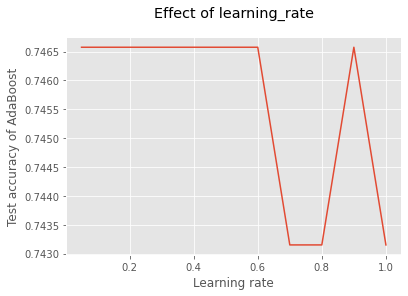

In [179]:
x = [0.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
y = []

for i in x:
  adaclf = AdaBoostClassifier(
                              n_estimators=50,
                              learning_rate=i,
                              random_state=1)
  
  adaclf.fit(X_train2, y_train2)
  adaclf_test_sc = accuracy_score(y_test2, adaclf.predict(X_test2))
  y.append(adaclf_test_sc)

plt.title("Effect of learning_rate", pad=20)
plt.xlabel("Learning rate")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(x, y)

Medir el efecto de n_estimators

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

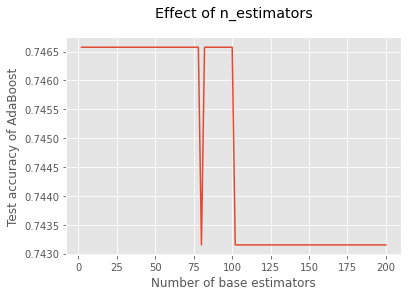

In [183]:
x = list(range(2, 202, 2))
y = []

for i in x:
  adaclf = AdaBoostClassifier(
                              n_estimators=i,
                              learning_rate=0.5,
                              random_state=1)
  
  adaclf.fit(X_train2, y_train2)
  adaclf_test_sc = accuracy_score(y_test2, adaclf.predict(X_test2))
  y.append(adaclf_test_sc)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.title("Effect of n_estimators", pad=20)
plt.xlabel("Number of base estimators")
plt.ylabel("Test accuracy of AdaBoost")
plt.plot(x, y)

Grid Search

In [184]:
parameters_ab= {
    'n_estimators': list(range(2, 202, 2)),
    'learning_rate': [0.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
ab = AdaBoostClassifier(random_state=1)
grid_ab = GridSearchCV(ab,parameters_ab, scoring="accuracy", n_jobs=-1, cv=5)
grid_ab.fit(X_train2,y_train2)

print("Optimal hyperparameter combination:", grid_ab.best_params_,'\n')

Optimal hyperparameter combination: {'learning_rate': 0.8, 'n_estimators': 20} 



c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
modelo_AD = AdaBoostClassifier(random_state=1,n_estimators=20,learning_rate=0.8).fit(X_train2,y_train2)

print("Test Score: {}".format(modelo_AD.score(X_test2,y_test2)))

pred_ab = modelo_AD.predict(X_test2)
print()
print("AdaBoost")
print("Confusion Matrix:")
print(confusion_matrix(y_test2, pred_ab))
print()
print("Classification Report")
print(classification_report(y_test2, pred_ab))

Test Score: 0.7465753424657534

AdaBoost
Confusion Matrix:
[[  0   0   0  20]
 [  0   0   0  37]
 [  0   0   0  17]
 [  0   0   0 218]]

Classification Report
               precision    recall  f1-score   support

Lee en exceso       0.00      0.00      0.00        20
Lee frecuente       0.00      0.00      0.00        37
    Lee mucho       0.00      0.00      0.00        17
 Lee muy poco       0.75      1.00      0.85       218

     accuracy                           0.75       292
    macro avg       0.19      0.25      0.21       292
 weighted avg       0.56      0.75      0.64       292



c:\Users\lourd\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarnin

Validación Modelo

In [33]:
val = pd.read_excel('val.xlsx')

In [34]:
pred_val = modelo_AD.predict(val)
pred_val

c:\Users\lourd\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array(['Lee muy poco', 'Lee muy poco', 'Lee muy poco'], dtype=object)

In [35]:
y_true=["Lee en exceso", "Lee muy poco", "Lee muy poco"]

In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, pred_val))

print()
print("Classification Report")
print(classification_report(y_true, pred_val))

Confusion Matrix:
[[0 1]
 [0 2]]

Classification Report
               precision    recall  f1-score   support

Lee en exceso       0.00      0.00      0.00         1
 Lee muy poco       0.67      1.00      0.80         2

     accuracy                           0.67         3
    macro avg       0.33      0.50      0.40         3
 weighted avg       0.44      0.67      0.53         3



c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lourd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
